In [1]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:* Simón CortésOcampo

*Identificación:* 1027800060

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [23]:
integrando = lambda w,z,y,x : x+y+z+w

a,b = 0,1
c,d = lambda x: x**2 , lambda x:x+1
e,f = lambda y: y**2 , lambda y:y+2
g,h = lambda z: z**2 , lambda z:z+3

def integral_dw(z, y, x):
    return quad(integrando, g(z), h(z), args=(z, y, x))[0]

def integral_dz(y, x):
    return quad(integral_dw, e(y), f(y), args=(y, x))[0]

def integral_dy(x):
    return quad(integral_dz, c(x), d(x), args=(x))[0]

integral_dx, error = quad(integral_dy, a, b)

print(f'El valor de la integral es {integral_dx} y su error es {error}')

El valor de la integral es -0.6500971589021813 y su error es 1.5813253071872154e-13


In [26]:
from scipy.integrate import nquad

w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

result_real, error_real = nquad(
    integrando,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f'El valor real de la integral usando nquad es {result_real} y su error es {error_real}')

print(f'El error relativo es {np.abs(integral_dx - result_real)}')

El valor real de la integral usando nquad es -0.6500971589021813 y su error es 1.8391891749223705e-12
El error relativo es 0.0


# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



In [40]:
a = 1
I = 3
mu_0 = 4*np.pi

def A_phi(a,r,theta,mu_0, I):
  k = np.sqrt((4*a*r*np.sin(theta))/(a**2 + r**2 + 2*a*r*np.sin(theta)))
  func_K = lambda phi:  1/np.sqrt(1 - k**2 * (np.sin(phi))**2)
  K = quad(func_K , 0, np.pi/2)[0]
  func_E = lambda phi: np.sqrt(1 - k**2 * (np.sin(phi))**2)
  E = quad(func_E ,0, np.pi/2)[0]
  return (mu_0/(4*np.pi))*((4*I*a)/(np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta))))*(((2-k**2)*K - 2*E)/(k**2))

<ipython-input-40-aae2e5115123>:11: RuntimeWarning: invalid value encountered in scalar divide
  return (mu_0/(4*np.pi))*((4*I*a)/(np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta))))*(((2-k**2)*K - 2*E)/(k**2))


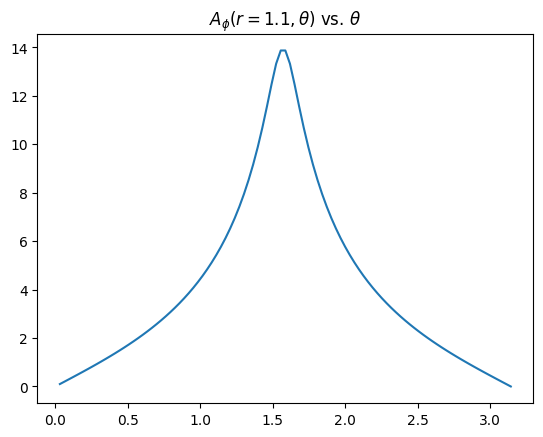

In [44]:
#a

r=1.1
theta_vals = np.linspace(0, np.pi, 100)

A_phi_a = [A_phi(a,r,theta_val,mu_0, I) for theta_val in theta_vals]

plt.plot(theta_vals, A_phi_a)
plt.title('$A_{\phi}(r=1.1, \\theta)$ vs. $\\theta$')
plt.show()

<ipython-input-40-aae2e5115123>:11: RuntimeWarning: invalid value encountered in scalar divide
  return (mu_0/(4*np.pi))*((4*I*a)/(np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta))))*(((2-k**2)*K - 2*E)/(k**2))


Text(0.5, 1.0, '$A_{\\phi}(r, \\theta = \\pi/3)$ vs. $r$')

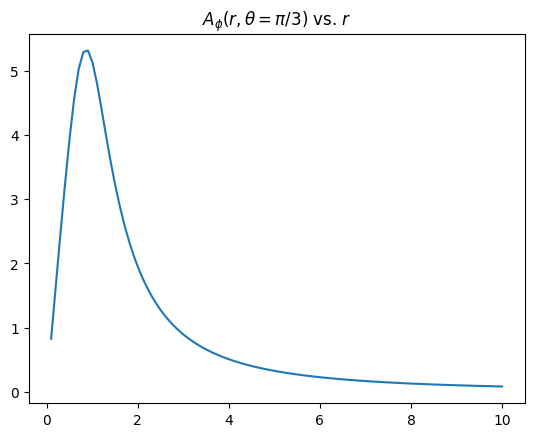

In [46]:
#b

theta = np.pi/3
r_vals = np.linspace(0,10,100)

A_phi_b = [A_phi(a,r_val,theta,mu_0, I) for r_val in r_vals]

plt.plot(r_vals, A_phi_b)
plt.title('$A_{\phi}(r, \\theta = \pi/3)$ vs. $r$')

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

In [92]:
def potencia_inversa(A, tol=1e-7, max_iter=100):
  x = np.random.randint(1,9,(A.shape[0],1))
  y = la.solve(A,x)
  x_ = y/la.norm(y)
  eig = (np.transpose(x_)@A@x_)/(np.transpose(x_)@x_)
  for k in range(max_iter):
    y_new = la.solve(A,x)
    x_new = y/la.norm(y)
    eig_new = (np.transpose(x)@A@k)/(np.transpose(x)@x)
    if np.abs(eig_new - eig) < tol:
      return eig
    else:
      x_new = y_new

#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [89]:
A = np.random.randint(1,9,(5,5))

def det(A):
  n = A.shape[0]
  producto = 1
  for i in range(n):
    autovalores = la.eig(A)[0]
    producto *= autovalores[i]
  return producto

det_A_eig = det(A)
det_A_linalg = la.det(A)

print(f'El determinante usando la multiplicación de autovalores es {det_A_eig} y el determinante usando el método de linalg es {det_A_linalg}')

El determinante usando la multiplicación de autovalores es (363.99999999999983-2.145182850043022e-14j) y el determinante usando el método de linalg es 363.9999999999993
